# Part 1: Loading Image Data

* 지금까지는 이미 잘 정리된 정형 데이터를 활용한 예제를 살펴봤습니다
* 본 notebook에서는 실제 data를 NN에 적용하기 위해서 data를 정리하는 방법에 대해서 실습합니다
* 이를 위해서 Kaggle에서 찾을 수 있는 [dataset of cat and dog photos](https://www.kaggle.com/c/dogs-vs-cats)을 활용합니다

* 아래 예제 사진입니다:

<img src='assets/dog_cat.png'>

* 본 dataset을 활용하여 고양이와 강아지 사진을 분류하는 작업을 수행하도록 하겠습니다
* 실습 정도의 난이도로 쉽게 해결가능한 과제이지만, 불과 몇년 전만해도 매우 어려운 작업이었습니다

## Google drive에서 자료 받기

* 자료가 아래 명령어로 받아지지 않을 경우 아래 링크를 통해서 직접 받아서 압축을 풀어주세요
[goodle drive](https://drive.google.com/file/d/1Glpk4kdbrs_mXJX8Nl71Mw4SfaFsl45u/view?usp=sharing)

* Image data를 읽어드리는 작업은 `torchvision` ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder))에 포함된 `datasets.ImageFolder`을 활용하여 수행합니다.

* 예를 들어서 `ImageFolder` 다음과 같이 활용합니다:

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
```

* 여기서 `'path/to/data'` data가 포함된 data directory이고, [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html)은 `torchvision` module에 포함된 여러 parameter를 입력하기 위하여 사용자가 정의하는 여러가지 변환 parameter 입니다. 
* `ImageFolder`는 다음과 같은 형태로 file과 directory가 생성되었을 것이라고 가정합니다:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

* 위에서 중요한 구분은 각 class별로 directory가 따로 생성된 것입니다 (`cat` and `dog`)
* Pytorch에서는 각 image를 directory 이름에 맞춰서 label을 정합니다. 즉, `123.png` 는 label `cat`으로 읽어드립니다
* 본 과제에서는 [이 링크](https://drive.google.com/file/d/1rF0QB7Ifc_FCq9uvSl_KGR5PAYNiM7Br/view?usp=sharing
)를 통해서 dataset을 직접 다운로드 받거나...
* 아래 과정을 통해서 받을 수 있습니다



In [ ]:
!pip install googledrivedownloader

In [ ]:
from os.path import exists
from google_drive_downloader import GoogleDriveDownloader as gdd
import tarfile 

if exists("./Cat_Dog_data.tgz"):
    !rm -rf ./Cat_Dog_data.tgz
    
gdd.download_file_from_google_drive(file_id='1Glpk4kdbrs_mXJX8Nl71Mw4SfaFsl45u',
                                   dest_path = './Cat_Dog_data.tgz')

tf = tarfile.open("Cat_Dog_data.tgz")
tf.extractall()

* 위 과정을 통해서 자료를 모두 download 받았으면 위는 주석처리하는 것이 편합니다

### Transforms

* 위 형식에서 알아본 것과 같이, `ImageFolder`를 사용하여 data를 읽어드리는 경우 몇 가지 transform을 정의해야합니다
* 예를 들어서, 각 이미지 파일은 서로 크기가 다를 수 있는데, 같은 크기로 (input size)를 맞춰줘야합니다
  * 이경우는 크기를 변경하거나 `transforms.Resize()`, 잘라내거나 `transforms.CenterCrop()`, `transforms.RandomResizedCrop()` 합니다
* 물론 image 파일을 `transforms.ToTensor()`를 활용하여 Pytorch tensor로 바꿔주는 작업도 해야하고요
* 일반적으로 이와 같이 필요한 transformation을 `transforms.Compose()`라는 모듈을 사용하여 정렬합니다. 그러면 알아서 sequential하게 수행할 수 있는 형태로 자료구조를 만들어 줍니다.
* 아래 예시는 scale, crop, 한 후에 tensor로 변경하는 방법의 예시 입니다:

```python
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

```

이외에도 많은 transfrom 들이 존재합니다 [Pytorch.org 설명 자료](http://pytorch.org/docs/master/torchvision/transforms.html). 

### Data Loaders

* `ImageFolder`를 load 한 후에는 [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)로 넘겨줘야 합니다
* `DataLoader`는 `ImageFolder`로 부터 받은 dataset을 받아서 image와 해당 label을 여러개의 batch 로 정리하여 return 합니다
  * 이때, 설정에서 batch 크기등을 설정할 수 있습니다.
* `DataLoader`를 받는 방법은 다음과 같습니다:

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

* 위 명령어에서 `dataloader`는 [generator](https://bluese05.tistory.com/56) 입니다. Iterator 설명링크도 generator 링크에 포함되어 있으나 참고하세요.
* 즉 data를 부르기 위해서는 loop를 돌면서 부르거나, iterator로 변경해서 `next()`를 call하면 됩니다

```python
# Looping: 각 loop에서 batch를 받는다
for images, labels in dataloader:
    pass

# 한개의 batch를 받는다
images, labels = next(iter(dataloader))
```
 
>**Exercise:** Load images from the `Cat_Dog_data/train` folder, define a few transforms, then build the dataloader.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

In [ ]:
# helper nd module 오류 발생 시 아래 명령어 주석 제거 후 실행, 위의 셀 다시 실행
# !wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

In [ ]:
data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

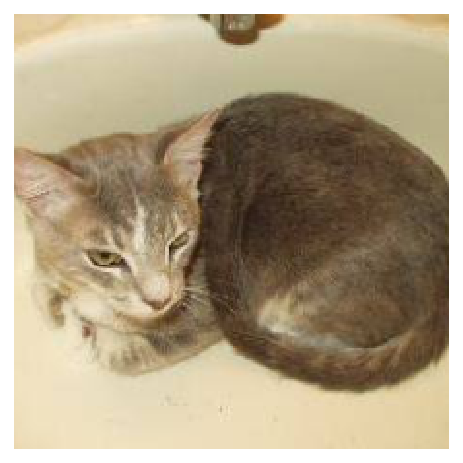

In [ ]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

위 과정을 성공했으면, 아래와 같은 형태로 이미지가 보일 것입니다 (랜덤하게 image file을 결정하기 때문에 사진을 다르게 나올 것입니다):

<img src='assets/cat_cropped.png' width=244>

## Data Augmentation

* 기계학습의 성능은 일반적으로 데이터의 양에 많을 수록 좋은 성능을 갖습니다
* 데이터의 양을 늘리는 한가지 방법은 데이터 random하게 변경하여 새로운 데이터로 사용하는 방법입니다 `data augementation`
* 예를 들어서 random하게 image를 rotate, mirror, scale, crop 하여 training 하는 방법이 있습니다

* Random하게 rotate, scale, crop, flip을 하는 transform 방법은 아래와 같습니다:

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
```

* 위 과정에서 추가하는 `transforms.Normalize`는 image의 값을 정규화하는 과정인데, 매우 유용하고 성능을 개선할 수 있는 중요한 단계입니다
* 평균값 리스트와 표준편차 리스트를 입력하면, 각 color channel (RGB)는 다음 공식에 의해서 normalize 됩니다

```input[channel] = (input[channel] - mean[channel]) / std[channel]```

* 여기서 `mean`을 빼는 작업은 data를 `0`을 중심으로 두는 변형을 하고, `std`를 나누는 것은 값들을 `-1`에서 `1`사이로 좁히는 작업을 수행합니다
* Normalization 과정 없이는 network이 train에 실패하는 경우가 많습니다

* 모든 가능한 transform은 [the available transforms here](http://pytorch.org/docs/0.3.0/torchvision/transforms.html) 찾아보실 수 있습니다
* Validation/Testing 과정에서는 위와 같은 image를 인공적으로 변형하은 수행하지 않고, 원 이미지를 통해서만 test를 합니다

>**Exercise 1 [5 points]:** Define transforms for training data and testing data below. Leave off normalization for now.
[참고](https://tutorials.pytorch.kr/beginner/data_loading_tutorial.html)

1. train_transforms 를 위와 같이 Normalize만 제외하고 정의
2. test_transforms을 Resize(255), CenterCrop(224)로 수행
3. ImageFolder를 사용하여 train_data, test_data에 위 transform 적용하여 각 data 불러오기
4. trainloader와 testloader 생성: `DataLoader` 모듈 적용하여 batch size 32로 생성

In [ ]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])
# train data를 Normalize를 제외한 전처리 과정을 통해 tensor로 바꿔줌


test_transforms = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
# test data를 Resize(255) , CenterCrop(224) 로 하여 전처리 과정을 통해 tensor로 바꿔줌 

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
# data_dir에 정의된 이미지를 불러오고 train_transforms 형식으로 변경해줌

test_data = datasets.ImageFolder(data_dir, transform=test_transforms)
# data_dir에 정의된 이미지를 불러오고 test_transforms 형식으로 변경해줌

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
# 전처리가 끝난 train_data를 랜덤으로 32개(batch size 32)를 불러와서 저장

testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)
# 전처리가 끝난 test_data를 랜덤으로 32개(batch size 32)를 불d러와서 저장


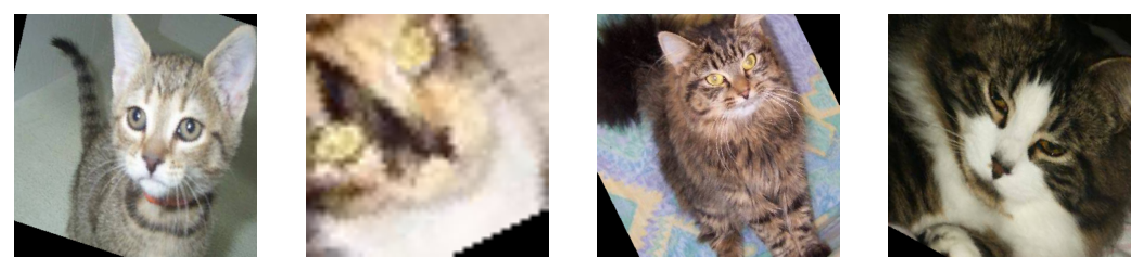

In [ ]:
# trainloader
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

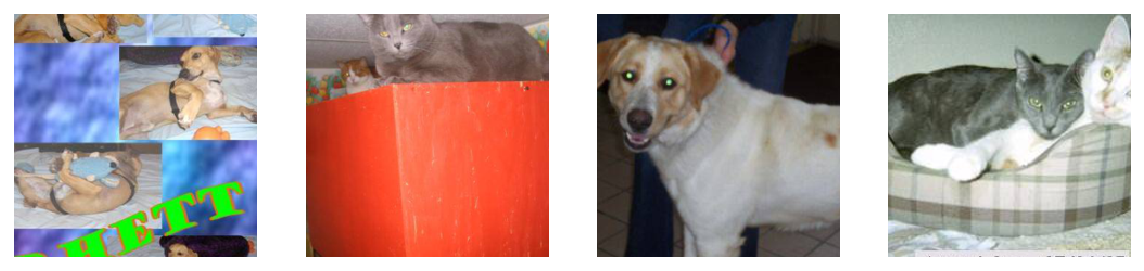

In [ ]:
# testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

# Part 2: Neural networks with PyTorch

* Deep learning network은 여러 layer로 구성이 됩니다
* 이전 시간에 배운바와 같이 weight matrix를 사용해서 각 layer를 만들 수 있었죠
* 이 과정을 Pytorch의 `nn` module을 활용하여 만드는 편리한 방법을 학습합니다

In [ ]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

* 본 과정에서는 MNIST dataset에서 제공하는 greyscale handwritten digits들을 classify 하는 문제를 학습합니다
* MNIST handwritten digits는 숫자에 대한 손글씨를 28x28 흑백 image로 담은 dataset 입니다
* 예제는 다음과 같습니다:

<img src='assets/mnist.png'>

* 작업을 수행하기 위해서 먼저 dataset을 가져와야 합니다
* 본작업을 편하게 해주는 package가 `torchvision`입니다
* `torchvision`을 통해서 dataset을 받는 방법을 다음 셀을 실행해서 해보도록 하죠


In [ ]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

9920512it [00:04, 2412661.07it/s]                                                                                      


Extracting C:\Users\newxe/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 64511.07it/s]                                                                                          


Extracting C:\Users\newxe/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:01, 1121886.62it/s]                                                                                      


Extracting C:\Users\newxe/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 17005.74it/s]                                                                                           


Extracting C:\Users\newxe/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [ ]:
# Creating a tuple with one value (0.5,) vs (0.5) try it
(0.5,)

(0.5,)

* 위에서 학습한 것과 같이 `trainloader` 를 통해서 data를 받습니다.

* `iter(trainloader)` 통해서 image와 lable을 받는 방법과
* Loop를 통해서 받는 방법을 사용할 수 있습니다

```python
for image, label in trainloader:
    ## do things with images and labels
```

* 위에서 `trainloader`는 batch size를 64로 두고, `shuffle=True`로 설정하였습니다
  * batch size는 한번 SGD를 수행하는 단위 (parameter update)이고, 
  * `shuffle=True`로 두는 것은 한번 dataloader의 데이터를 처음부터 끝까지 한번 돌고, 다시 부를때 shuffle을 수행한다는 뜻입니다
  
* 아래 예제를 통해서 trainloader에서 한개의 batch를 받았을때 어떤 구조인지를 살펴보죠
  * `images`는 `(64, 1, 28, 28)` 크기의 tensor입니다
  * 이는 64개의 batch에 1개 color channel (흑백), 28x28 pixel 이미지 라는 구조임을 확인합니다


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


* 아래 모듈을 사용해서 image를 확인 할 수 있습니다

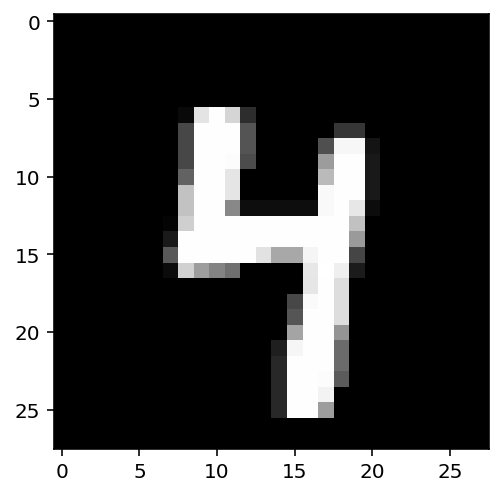

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

* 우선, 여러분이 지난 시간에 배운 방식으로 네트워크를 구성하고...
* 다음 단계에서 Pytorch `nn` 모듈 통해서 같은 작업을 수행하는 방법을 배워보도록 하겠습니다

### input 구조
* 지금까지 배운 네트워크는 *fully-connected* 또는 *dense* networks 입니다. 
* 각 layer의 unit은 다음 layer의 모든 unit에 연결되는 구조입니다
* Fully connected network에서는 각 layer가 한개의 row-vector로 표현되며, 이를 batch 단위로 matrix구조로 저장합니다
  * 즉 1개의 row는 sample data가 되고 batch 크기로 row-vector들을 모은 matrix 구조가 기본 단위입니다
* 하지만, 우리 데이터의 구조는 `(64, 1, 28, 28)`로 64개의 28x28 이미지를 모아둔 구조입니다
  * 중간 1은 color channel을 구분하기 위해서 남겨둔 부분입니다만, 우리 data는 흑백이기 때문에 1입니다. 당연히 필요없지만, 저장하는 관습입니다.
* 결론적으로, 우리는 fully connected network에 적용하기 위해서 28x28 data를 1차원 vector로 변형해야 합니다
  * 즉,  `(64, 1, 28, 28)` 구조를 `(64, 784)`로 변경 필요!
* 이를 위해서 사용하는 것이 *flattening* 입니다 ->  flatten 2D images to 1D vectors

### output 구조
* 전 시간에 구성한 네트워크는 output이 2개로 지정하여 실습했습니다
* 본 과제에서는 output이 몇개로 구성되어야 할까요?
  * 손글씨가 0,...,9 이니 우리는 10개의 element로 구성된 vector를 output으로 가져오도록 하겠습니다
* 즉, 한개의 이미지를 입력하면, 0,...,9 에 해당하는 가능성을 확률 분포로 저장하는거죠
  * output이 [0.1, 0.2, 0.0, ..., 0.7] 이면 image가 `0`일 확률은 `0.1`, `1`일 확률은 `0.2`, `9`일 확률은 `0.7` 과 같은 형태로 이해하면 됩니다
* 즉, 각 이미지당 0,...,9 일 확률을 *확률분포*의 형태로 출력하는 구조입니다

* 우선 지난 시간에 배운 방식으로 네트워크를 구성해보죠 (복습한다고 생각하시고~)


> **Exercise 2 [5 points]:** 
> 
> 1. images를 `(64, 1, 28, 28)` 구조를 `(64, 784)`로 변경하여 `inputs`에 저장
> 2. Hidden layer 256, output layer 10 으로 네트워크 구성
> 3. 각 단계에서 weight와 bias는 randn을 통해서 랜덤 값으로 생성하여 구성함
> 4. activation은  주어진 함수 사용
> 5. torch.mm을 통해서 연산

In [ ]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.reshape(64, 784) # 이미지를 (64, 1, 28, 28) 구조에서 (64, 784)로 변경

# Create parameters
w1 = torch.randn(784, 256) # Hidden layer 256으로 설정, inputs 와 연산해야 하므로 (784, Hidden layer)
b1 = torch.randn(64, 256) # bias 는 input과 w1 연산 결과에 맞게 (64, 256) 으로 설정

w2 = torch.randn(256, 10) # (Hidden layer, Output layer) 로 w2를 설정
b2 = torch.randn(64, 10) # w2 연산 결과 (64, Output layer) 로 bias 설정

h = activation(torch.mm(inputs, w1) + b1) # activation 함수로 Hidden layer 를 구함

out = activation(torch.mm(h, w2) + b2) # activation 함수로 Output layer 를 구함

In [ ]:
out.shape

torch.Size([64, 10])

* 이제 네트워크를 구성하였으니, 이미지를 입력하여 확률 분포를 받아서 아래와 같이 표출되도록 하고자 합니다:
<img src='assets/image_distribution.png' width=500px>

* 결과값을 보면, 모든 확률이 거의 동일하다는 것을 알 수 있습니다
  * Weight를 training하지 않고 random값으로 연산한 당연한 결과입니다 (아직 training 안됨)

* 위와 같은 문제를 classification 문제라고 하는데, classification에서 주로 사용하는 output activation 함수는
[**softmax** function](https://en.wikipedia.org/wiki/Softmax_function) 입니다:

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

* Softmax 함수에 적용된 output는 확률 분포의 조건을 만족한다는 것을 확인해보세요
  * 최소값, 최대값의 범위 $0\le \sigma(x_i)\le 1$
  * $\sum_i \sigma(x_i)=1$
 

> **Exercise 3 [5 points]:** 

1. `softmax` 작성 
  * 위 네트워크에서 출력된 `out`은 확률분포의 형태가 아닙니다
  * 확률분포가 되도록 softmax를 작성학고, `out`에 적용하세요
  * return 값은 각 batch 내 샘플 별로 확률 분포를 출력하도록 구성 (row가 확률분포)
  * 주의) 연산을 위한 각 tensor의 shape에 신중하게 생각하고 수행해야하는 작업입니다 (한줄로 코딩 가능)
  * softmax(x)은 위 작성한 코드의 `out`을 입력으로 받습니다. `out`의 형태와 구성을 이해해야합니다.
  * 즉 return tensor의 첫번째 row는 1번 샘플에 대한 확률분포, 2번 row는 2번째 샘들의 확률분포,..총 64개row가 있겠죠?
  * 주의) torch.sum(, dim= xxx) 함수와 dim 옵션을 활용
  * broadcasting을 통해서 나누는 작업으로 수행 (즉 차원 변경에 신경을 쓰셔야합니다, view 등 활용)
 

In [ ]:
## Solution
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=1).view(64,1)
    # torch.exp 를 이용해 e^x 를 만듦
    # sum(dim=1) 을 사용해 row 별로 계산한 값이 1을 넘을 수 없게 만듦
    # view(64,1) 을 사용해 broadcasting을 통해서 나누는 작업을 수행(차원 변경)


probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch

* `nn` module을 사용해서 같은 네트워크를 구성해보죠
* 아래 예제는 784 inputs, 256 hidden units, 10 output units과 softmax output을 가정하고 구성함

In [ ]:
from torch import nn

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

단계별로 설명하죠

```python
class Network(nn.Module):
```

* `Network` class를 정의하는데, `nn.Module`로부터 상속을 받습니다 (항상 수행한다고 보시면 됩니다)
* `super().__init__()`은 `nn.Module`의 `__init__()`을 가져오는 단계로 역시 항상 수행한다고 보시면 됩니다

```python
self.hidden = nn.Linear(784, 256)
```
* 위 줄은 선형변환을 수행합니다 
  * 즉  $x\mathbf{W} + b$ 연산을 784 inputs 256 output 구조로 수행하여 self.hidden에 저장합니다
  * 본 모듈은 자동으로 weight 와 bias tensor를 생성합니다
  * 나중에 instance를 생성하고 나면 (예를 들어서 `net`이라고 하죠), `net.hidden.weight` 과 `net.hidden.bias`로 weight와 bias를 부를 수 있습니다

```python
self.output = nn.Linear(256, 10)
```

* 비슷한 방법으로 output 선형 변환을 정의합니다 (256 inputs and 10 outputs)


```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```

* 위 줄에서는 sigmoid activation와 softmax activation function을 불러옵니다. 
  * softmax에서 `dim=1` 설정은 위 학습에서와 같이  `nn.Softmax(dim=1)`를 수행할때 sum을 column들에 대해서 수행하라는 명령어입니다

```python
def forward(self, x):
```

* Pytorch에서 만든 network는 *반드시* `forward` method가 정의되어야 합니다!
  * Tensor `x`를 받아서 `__init__`에서 정의한 과정을 통해서 순차적으로 수행하는 것을 정의해줍니다

```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```

* 각 단계를 순차적으로 적용되는 과정입니다
* `x`값을 다른 값으로 변경해도 무방하지만, 입력 출력 관계를 순차적으로 되도록 설계해야함
*  `__init__`에서 어떤 순서로 정의해도 관계없지만, forward에서는 순서를 잘 정의해줘야함


* 이제 `Network` object를 생성해보죠

In [ ]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

* 위에서 정의한 네트워크를 `torch.nn.functional` module을 통해서 조금 더 간결하게 작성각능합니다
* 아래 방법이 이후 (현실에서) 가장 많이 사용하는 방법이 될 것입니다
  * 위와 같이 단계적으로 하는 이유는 각 모듈이 무엇을 하는지 정확하게 이해하기 위해서 입니다
* `torch.nn.functional`를 부르는 관습은 `F`로 정합니다
  * `import torch.nn.functional as F`

In [ ]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

### Activation functions

* 지금까지는 softmax function 위주로 실습했지만, 다양한 activation function이 존재합니다 
* 수업에서 배운 (또는 배울것) 처럼 non-linear function이 모델에 포함되어야 합니다
* 몇가지 activation function의 예는 다음과 같습니다: Tanh (hyperbolic tangent), ReLU (rectified linear unit)

<img src="assets/activation.png" width=700px>

* 실제 적용에서는 ReLU가 hidden layer에서 가장 많이 사용됩니다. 

### Build a Network using nn

<img src="assets/mlp_mnist.png" width=600px>

> **Exercise 4 [10 points]:** 
> 1. 2개의 hidden layer이 있는 네트워크 구성
> 2. 첫번째 hidden layer는 128 unit
> 3. 두번째 hidden layer는 64 unit
> 4. 두 hidden layer 모두 ReLU 적용
>   * ReLU는 `nn.ReLU` 또는 `F.relu` module로 사용할 수 있습니다
> 5. 각 layer를 그 네트워크 구성 방법에 맞춘 이름을 주는 것이 좋은 습관입니다. 예를 들어서 fully connected layer는 `fc`
>   * 즉 코드에서 `fc1`, `fc2`, `fc3`로 각 layer를 정의하도록 하죠
> 6. output layer softmax function 적용 (위 그림에서와 같이 cross entropy가 아닙니다! softmax 로 적용)


In [ ]:
## Solution

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128) # 첫 번째 hidden layer 128
        self.fc2 = nn.Linear(128, 64) # 두 번째 hidden layer 64 , 계산을 위해 이전 레이어의 크기를 row로 이용
        
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64,10) # Output layer는 10 유닛, 계산을 위해 이전 레이어의 크기(64)를 row로 이용
     
    
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = nn.ReLU(self.fc1(x)) # 첫 번째 hidden layer에 ReLU 적용
        x = F.relu(self.fc2(x)) # 두 번째 hidden layer에 ReLU 적용
        x = F.softmax(self.fc3, dim=1) # output layer에 softmax function 적용
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

* 위에서 설정한 네트워크는 자동으로 weight와 bias를 초기화 합니다 (물론, 초기화 방식도 정의가능합니다)
* 각 layer의 weight와 bias는 정의한 layer에 포함되어 자동 저장됩니다. 
* weight값을 찾는 방법은 예를 들어서 `model.fc1.weight` 불러서 사용합니다

In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0240,  0.0189,  0.0223,  ...,  0.0111,  0.0266,  0.0158],
        [-0.0035, -0.0221, -0.0251,  ...,  0.0086,  0.0033, -0.0339],
        [ 0.0179, -0.0144,  0.0106,  ...,  0.0295,  0.0033, -0.0095],
        ...,
        [ 0.0312,  0.0244, -0.0289,  ...,  0.0308, -0.0275, -0.0084],
        [-0.0325,  0.0300,  0.0204,  ...,  0.0202, -0.0157,  0.0171],
        [-0.0149, -0.0111,  0.0160,  ..., -0.0005,  0.0201,  0.0283]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0333,  0.0247,  0.0076, -0.0130, -0.0048,  0.0083, -0.0147, -0.0019,
        -0.0141,  0.0262, -0.0306, -0.0236,  0.0060, -0.0139,  0.0330, -0.0322,
         0.0339,  0.0145, -0.0157, -0.0238, -0.0127, -0.0027, -0.0246, -0.0341,
        -0.0212, -0.0143,  0.0043,  0.0080,  0.0058,  0.0176, -0.0257,  0.0250,
        -0.0357, -0.0175,  0.0055, -0.0033, -0.0086,  0.0072, -0.0179, -0.0036,
         0.0289, -0.0313, -0.0355,  0.0181,  0.0191,  0.0353,  0.0115, -0.0140,
        -0.0071

* 초기화 값을 직접 설정하기 위해서는 저장된 메로리에 직접 값을 변경해야 합니다
  * 나중에 SGD를 적용하기 위해서 미분을 할때 값을 저장하는 autograd *Variables* 이기 때문인데 나중에 자세히 배우도록 하죠
* 직접 weight 값을 변경하기 위해서 `model.fc1.weight.data`를 사용합니다

In [ ]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0041, -0.0071, -0.0063,  ...,  0.0132, -0.0008,  0.0048],
        [ 0.0011,  0.0001,  0.0057,  ...,  0.0041,  0.0025,  0.0010],
        [ 0.0096, -0.0102, -0.0058,  ...,  0.0035, -0.0094,  0.0098],
        ...,
        [ 0.0126, -0.0148,  0.0064,  ..., -0.0157,  0.0100,  0.0051],
        [ 0.0023,  0.0084, -0.0027,  ...,  0.0018, -0.0255,  0.0026],
        [-0.0121,  0.0021, -0.0335,  ..., -0.0098, -0.0052,  0.0038]])

### Forward pass

* 이제 네트워크를 구성했으니, forward pass (네트워크에 data를 적용하는 과정)를 수행하도록 합니다

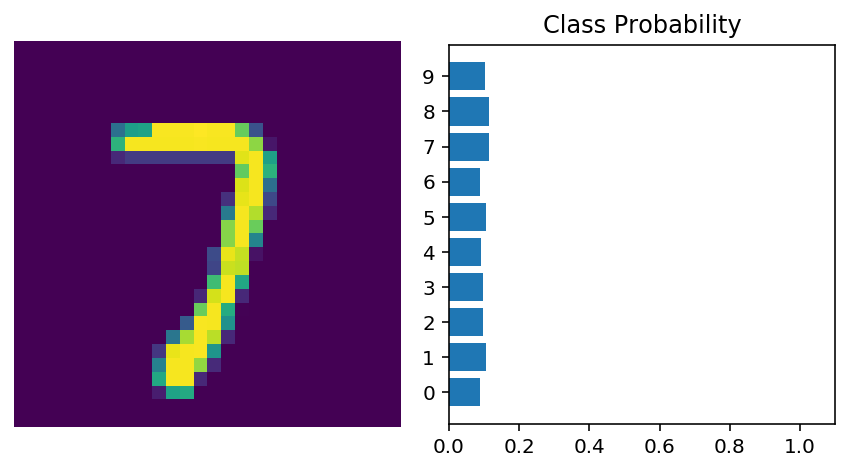

In [ ]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])
#ps = model.forward(images[img_idx,:].view(1,-1))

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [ ]:
images[0].shape

torch.Size([1, 784])

* 위 과정을 잘 살펴보세요
* 한가지 images.resize_ shape를 살펴보세요
* model.forward method 가 자료를 읽는 shape를 익혀둘 필요가 있습니다

여전히 학습을 하지 않은 상태이니 결과 값은 무시합니다

### Using `nn.Sequential`

* 마지막으로 네트워크를 구성하는 방법입니다
* `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential))을 사용하여 간단한 네트워크를 구성할때 자주 사용하는 방법입니다. 
* 위와 동일한 네트워크를 구성합니다

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


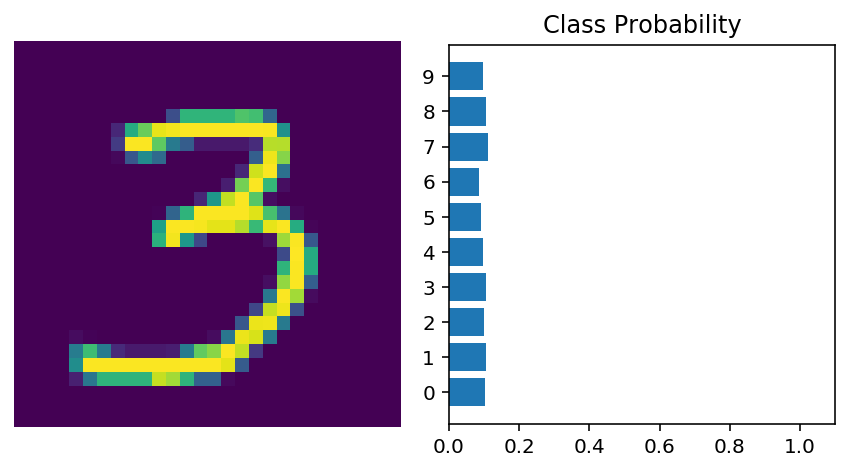

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

* 위와 같이 정의하는 경우 weight를 부르는 방법은 인덱스를 통해서 합니다, 예를 들어서 `model[0]`.

In [ ]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0239,  0.0101,  0.0320,  ..., -0.0137,  0.0248,  0.0331],
        [ 0.0039, -0.0129,  0.0073,  ...,  0.0223,  0.0003,  0.0151],
        [-0.0105, -0.0139, -0.0167,  ...,  0.0275,  0.0222, -0.0206],
        ...,
        [-0.0310, -0.0064, -0.0228,  ...,  0.0040, -0.0155, -0.0049],
        [ 0.0039, -0.0174, -0.0008,  ..., -0.0146, -0.0125,  0.0230],
        [-0.0129, -0.0176, -0.0034,  ..., -0.0255,  0.0195,  0.0244]],
       requires_grad=True)

* `nn.Sequential`를 통해서 정의하는 방법중에 각 layer별로 이름을 주는 방법은 다음과 같습니다

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

* 이렇게 정의하면 이름과 인덱싱 두 가지를 다 사용 가능합니다

In [ ]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
